## Part 1: The Doomsday Algorithm

The Doomsday algorithm, devised by mathematician J. H. Conway, computes the day of the week any given date fell on. The algorithm is designed to be simple enough to memorize and use for mental calculation.

__Example.__ With the algorithm, we can compute that July 4, 1776 (the day the United States declared independence from Great Britain) was a Thursday.

The algorithm is based on the fact that for any year, several dates always fall on the same day of the week, called the <em style="color:#F00">doomsday</em> for the year. These dates include 4/4, 6/6, 8/8, 10/10, and 12/12.

__Example.__ The doomsday for 2016 is Monday, so in 2016 the dates above all fell on Mondays. The doomsday for 2017 is Tuesday, so in 2017 the dates above will all fall on Tuesdays.

The doomsday algorithm has three major steps:

1. Compute the anchor day for the target century.
2. Compute the doomsday for the target year based on the anchor day.
3. Determine the day of week for the target date by counting the number of days to the nearest doomsday.

Each step is explained in detail below.

### The Anchor Day

The doomsday for the first year in a century is called the <em style="color:#F00">anchor day</em> for that century. The anchor day is needed to compute the doomsday for any other year in that century. The anchor day for a century $c$ can be computed with the formula:
$$
a = \bigl( 5 (c \bmod 4) + 2 \bigr) \bmod 7
$$
The result $a$ corresponds to a day of the week, starting with $0$ for Sunday and ending with $6$ for Saturday.

__Note.__ The modulo operation $(x \bmod y)$ finds the remainder after dividing $x$ by $y$. For instance, $12 \bmod 3 = 0$ since the remainder after dividing $12$ by $3$ is $0$. Similarly, $11 \bmod 7 = 4$, since the remainder after dividing $11$ by $7$ is $4$.

__Example.__ Suppose the target year is 1954, so the century is $c = 19$. Plugging this into the formula gives
$$a = \bigl( 5 (19 \bmod 4) + 2 \bigr) \bmod 7 = \bigl( 5(3) + 2 \bigr) \bmod 7 = 3.$$
In other words, the anchor day for 1900-1999 is Wednesday, which is also the doomsday for 1900.

__Exercise 1.1.__ Write a function that accepts a year as input and computes the anchor day for that year's century. The modulo operator `%` and functions in the `math` module may be useful. Document your function with a docstring and test your function for a few different years.  Do this in a new cell below this one.

In [1]:
import math
def anchor(year):
    c = year//100
    a = (5*(c%4)+2)%7
    return a

weekday = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
year = [1954,1776,2016]

for i in range(len(year)):
    print weekday[anchor(year[i])]

Wednesday
Sunday
Tuesday


### The Doomsday

Once the anchor day is known, let $y$ be the last two digits of the target year. Then the doomsday for the target year can be computed with the formula:
$$d = \left(y + \left\lfloor\frac{y}{4}\right\rfloor + a\right) \bmod 7$$
The result $d$ corresponds to a day of the week.

__Note.__ The floor operation $\lfloor x \rfloor$ rounds $x$ down to the nearest integer. For instance, $\lfloor 3.1 \rfloor = 3$ and $\lfloor 3.8 \rfloor = 3$.

__Example.__ Again suppose the target year is 1954. Then the anchor day is $a = 3$, and $y = 54$, so the formula gives
$$
d = \left(54 + \left\lfloor\frac{54}{4}\right\rfloor + 3\right) \bmod 7 = (54 + 13 + 3) \bmod 7 = 0.
$$
Thus the doomsday for 1954 is Sunday.

__Exercise 1.2.__ Write a function that accepts a year as input and computes the doomsday for that year. Your function may need to call the function you wrote in exercise 1.1. Make sure to document and test your function.

In [2]:
def doomsday(year):
    a = anchor(year)
    y = year%100
    d = (y + int(y/4) + a)%7
    return d

for i in year:
    print weekday[doomsday(i)]

Sunday
Thursday
Monday


### The Day of Week

The final step in the Doomsday algorithm is to count the number of days between the target date and a nearby doomsday, modulo 7. This gives the day of the week.

Every month has at least one doomsday:
* (regular years) 1/10, 2/28
* (leap years) 1/11, 2/29
* 3/21, 4/4, 5/9, 6/6, 7/11, 8/8, 9/5, 10/10, 11/7, 12/12

__Example.__ Suppose we want to find the day of the week for 7/21/1954. The doomsday for 1954 is Sunday, and a nearby doomsday is 7/11. There are 10 days in July between 7/11 and 7/21. Since $10 \bmod 7 = 3$, the date 7/21/1954 falls 3 days after a Sunday, on a Wednesday.

__Exercise 1.3.__ Write a function to determine the day of the week for a given day, month, and year. Be careful of leap years! Your function should return a string such as "Thursday" rather than a number. As usual, document and test your code.

In [3]:
def leap_year(year):
    leap = True
    if year%4 != 0:
        leap = False
    elif year%100 != 0:
        leap = True
    elif year%400 != 0:
        leap = False
    return leap

def day_of_week(date):
    date = str(date)
    month,day,year = [int(i) for i in date.split('/')]
    leap_dooms = {1:11,2:29}
    regular_dooms = {1:10,2:28}
    dooms = {3:21,4:4,5:9,6:6,7:11,8:8,9:5,10:10,11:7,12:12}
    if month in [1,2]:
        if leap_year(year):
            key_day = leap_dooms[month]
        else:
            key_day = regular_dooms[month]
    else:
        key_day = dooms[month]
    between = day-key_day
    return (doomsday(year)+between)%7

print weekday[day_of_week('7/21/1954')]

Wednesday


<em style="color:#F00">
-2: function does not return string
</em>

__Exercise 1.4.__ How many times did Friday the 13th occur in the years 1900-1999? Does this number seem to be similar to other centuries?

In [5]:
def Black_Friday(c,month,y):
    if y < 10:
        s = str(m)+'/13/'+str(c)+'0'+str(y)
    else:
        s = str(m)+'/13/'+str(c)+str(y)
    return day_of_week(s) == 5

total = 0
for y in range(100):
    for m in range(1,13):
        total += Black_Friday(19,m,y)
print(total)

l = []
for i in range(1,20):
    total = 0
    for y in range(100):
        for m in range(1,13):
            total += Black_Friday(i,m,y)
    l.append(total)
print l   
#It seems that this number keeps the same in each century.

172
[172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172]


__Exercise 1.5.__ How many times did Friday the 13th occur between the year 2000 and today?

In [6]:
import datetime
today = datetime.datetime.today()

total = 0
for c in range(20,(today.year//100)+1):
    for y in range(today.year%100):
        for m in range(1,13):
            total += Black_Friday(c,m,y)

last_month = today.month
if today.day<13:
    last_month = today.month-1
for m in range(1,last_month+1):
    total += Black_Friday((today.year//100),m,today.year%100)
    
print total

30


## Part 2: 1978 Birthdays

__Exercise 2.1.__ The file `birthdays.txt` contains the number of births in the United States for each day in 1978. Inspect the file to determine the format. Note that columns are separated by the tab character, which can be entered in Python as `\t`. Write a function that uses iterators and list comprehensions with the string methods `split()` and `strip()` to  convert each line of data to the list format

```Python
[month, day, year, count]
```
The elements of this list should be integers, not strings. The function `read_birthdays` provided below will help you load the file.

In [7]:
def read_birthdays(file_path):
    """Read the contents of the birthdays file into a string.
    
    Arguments:
        file_path (string): The path to the birthdays file.
        
    Returns:
        string: The contents of the birthdays file.
    """
    with open(file_path) as file:
        return file.read()

In [8]:
rawdata = read_birthdays("C:\Users\kevin\study\STA141B\\assignment_1\\birthdays.txt")
l = rawdata.strip().split('\n')

data = []
import re
for element in l:
    if re.search(r'\d+/\d+/\d+\t\d+',element):
        s = element
        s = s.replace('\t','/')
        data.append([int(i) for i in s.split('/')])

__Exercise 2.2.__ Which month had the most births in 1978? Which day of the week had the most births? Which day of the week had the fewest? What conclusions can you draw? You may find the `Counter` class in the `collections` module useful.

In [8]:
#(1)
from collections import Counter
data_month = Counter()
for i in range(len(data)):
    data_month[data[i][0]] += data[i][3]
a1 = data_month.most_common(1) #August

#(2)
data_week = Counter()
for i in range(len(data)):
    s_date = str(data[i][0])+'/'+str(data[i][1])+'/1978'
    s_weekday = day_of_week(s_date)
    data_week[s_weekday] += data[i][3]
a2 = data_week.most_common(1) #Tuesday
a3 = data_week.most_common()[-1] #Sunday

month = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
print('Most births month: '+month[a1[0][0]])
print('Most births day of the week: '+weekday[a2[0][0]])
print('Fewest births day of the week: '+weekday[a3[0]])

Most births month: August
Most births day of the week: Tuesday
Fewest births day of the week: Sunday


<em style="color:#F00">
-2: no conclusion
</em>

__Exercise 2.3.__ What would be an effective way to present the information in exercise 2.2? You don't need to write any code for this exercise, just discuss what you would do.

<p>I think we an use scatter plots to present the total number of births in each month or day of the week.</p>

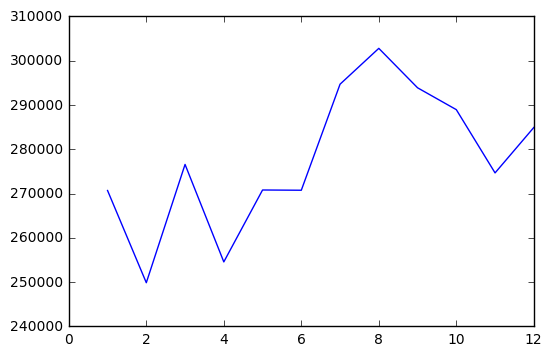

In [9]:
from matplotlib import pyplot as plt
list_month = [0]*12
for i in range(1,13):
    list_month[i-1] = data_month[i]
x1 = [i for i in range(1,13)]
plt.plot(x1,list_month)
plt.show()

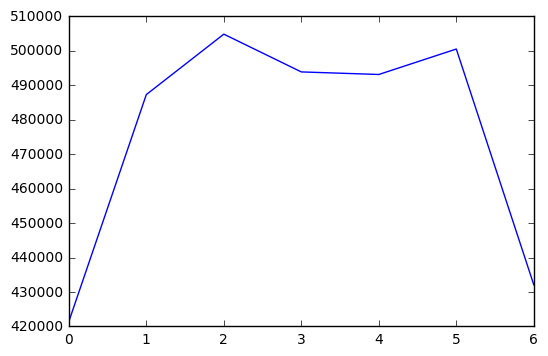

In [10]:
list_week = [0]*7
for i in range(7):
    list_week[i] = data_week[i]
x2 = [i for i in range(7)]
plt.plot(x2,list_week)
plt.show()